In [1]:
import pandas as pd
import numpy as np

In [2]:
data_csv = ["CNNIndonesia.csv", "detikcom.csv", "tvOneNews.csv", "VIVAcoid.csv"]
relative_path_data = "../../data/2. Filtered/"
organization_path = f"{relative_path_data}/organization"
replies_path = f"{relative_path_data}/replies"

organizaton_df = {data: pd.read_csv(f"{organization_path}/{data}") for data in data_csv}
replies_df = {data: pd.read_csv(f"{replies_path}/{data}") for data in data_csv}

In [3]:
organizaton_df[data_csv[0]].head()

,tweet_id,tweet_url,tweet_date,reply_count,like_count,tweet
0,1608812883831582721,https://twitter.com/CNNIndonesia/status/160881...,2022-12-30 13:10:56+00:00,612,1025,Baznas Jateng Buka Suara Gaduh Ganjar Pranowo ...
1,1608763761703424000,https://twitter.com/CNNIndonesia/status/160876...,2022-12-30 09:55:44+00:00,103,239,Ferdy Sambo Cabut Gugatan ke Jokowi dan Kapolr...
2,1608682638344327170,https://twitter.com/CNNIndonesia/status/160868...,2022-12-30 04:33:23+00:00,54,105,"Jokowi Terbitkan Perppu Cipta Kerja, Gugurkan ..."
3,1608638808718991360,https://twitter.com/CNNIndonesia/status/160863...,2022-12-30 01:39:13+00:00,112,339,RUU: ASN Bisa Dipensiunkan Dini Secara Massal ...
4,1608607065160953857,https://twitter.com/CNNIndonesia/status/160860...,2022-12-29 23:33:05+00:00,38,46,Aturan Baru BBM 1 Januari 2023: Pemerintah Lar...


# Check number of tweet

In [4]:
# Number of tweet
print("Organization")
for i in organizaton_df:
    print(i, len(organizaton_df[i]))
    
print("Replies")
for i in replies_df:
    print(i, len(replies_df[i]))

Organization
CNNIndonesia.csv 843
detikcom.csv 726
tvOneNews.csv 724
VIVAcoid.csv 651
Replies
CNNIndonesia.csv 4837
detikcom.csv 3720
tvOneNews.csv 3705
VIVAcoid.csv 2862


# Check word distribution

# Word distribution on all data

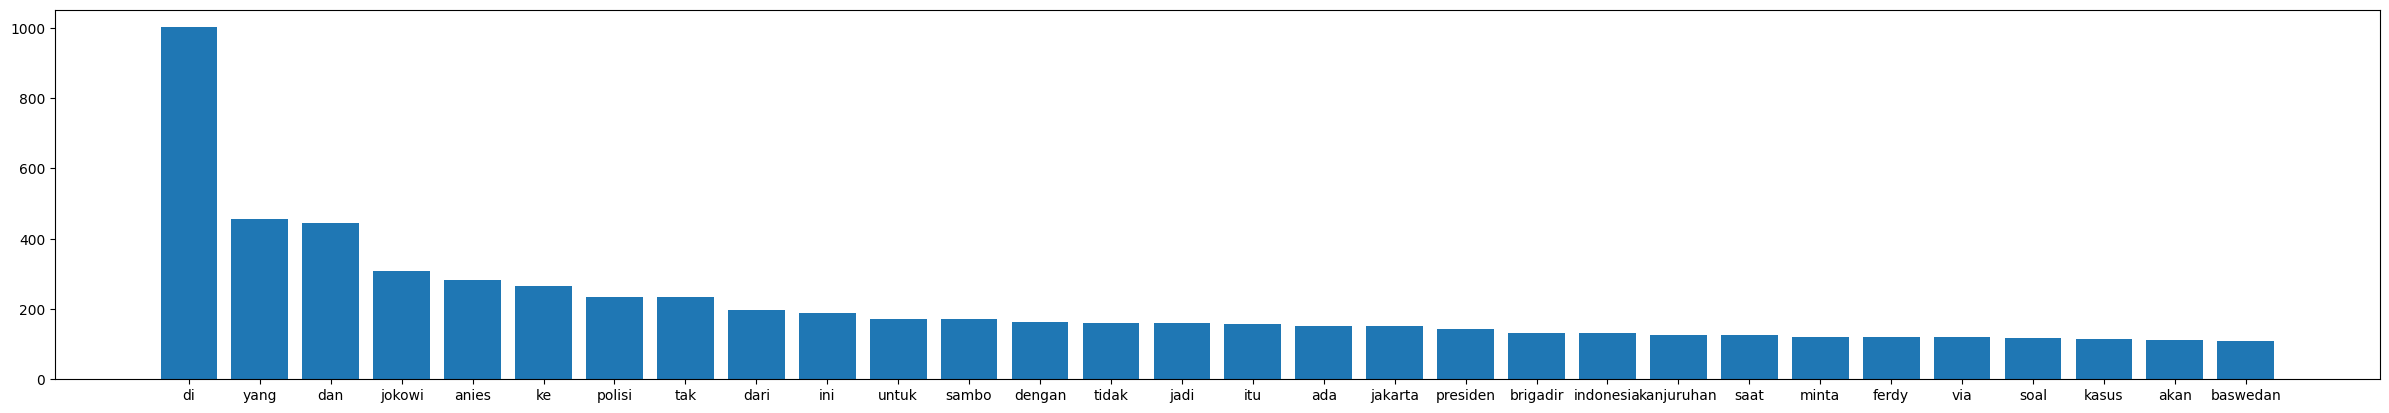

In [5]:
# Check word distribution
from kaelib.processor.TextProcessingPipeline import TextProcessingPipeline
import kaelib.processor.preprocessing_func as pf
import matplotlib.pyplot as plt
num_word = 30
width_fig_size = 30

preprocessor = TextProcessingPipeline([
    pf.lowercasing,
    pf.remove_username,
    pf.remove_url,
    pf.remove_punctuation
])

all_words = []
for i in organizaton_df:
    tweets = organizaton_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    tweets = tweets.to_list()
    for tweet in tweets:
        all_words += tweet.split()

word_num = {}
for word in all_words:
    if word not in word_num.keys():
        word_num[word] = 0
    word_num[word] += 1
    
word_num = dict(sorted(word_num.items(), reverse=True, key=lambda item: item[1]))
names = list(word_num.keys())[:num_word]
values = list(word_num.values())[:num_word]
plt.figure().set_figwidth(width_fig_size)
plt.bar(range(num_word), values, tick_label=names)
plt.show()

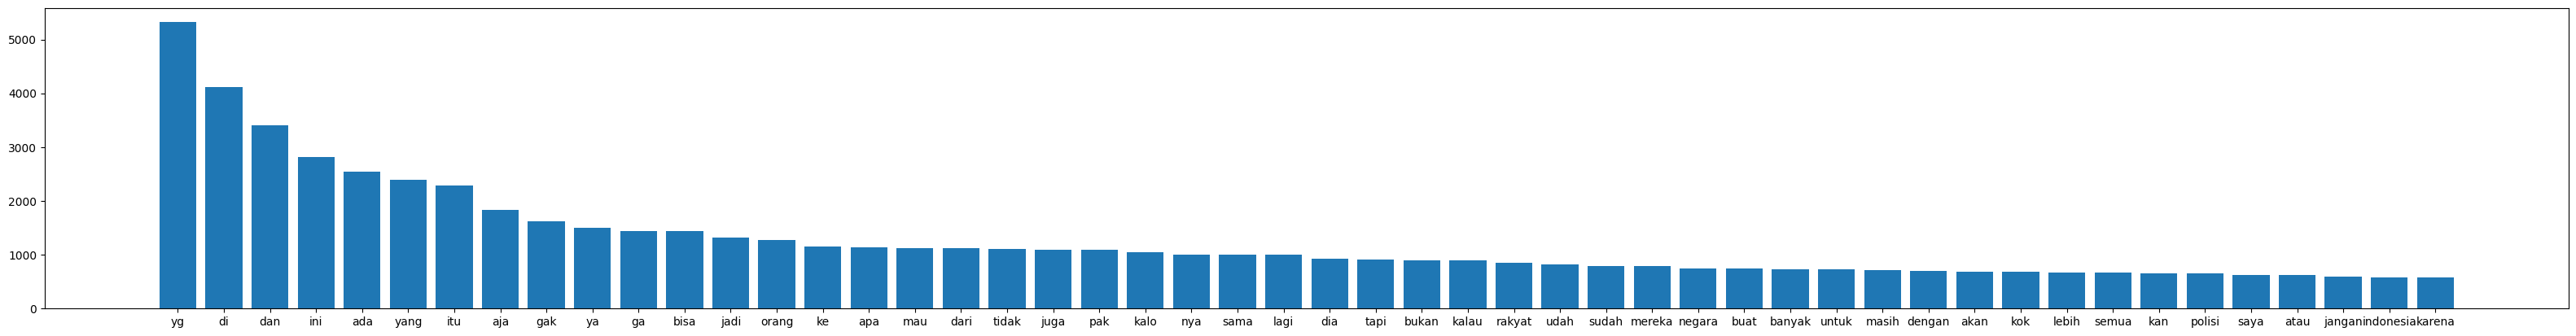

In [6]:
# Check word distribution
from kaelib.processor.TextProcessingPipeline import TextProcessingPipeline
import kaelib.processor.preprocessing_func as pf
import matplotlib.pyplot as plt
num_word = 50
width_fig_size = 40

preprocessor = TextProcessingPipeline([
    pf.lowercasing,
    pf.remove_username,
    pf.remove_url,
    pf.remove_punctuation
])

all_words = []
for i in replies_df:
    tweets = replies_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    tweets = tweets.to_list()
    for tweet in tweets:
        all_words += tweet.split()

word_num = {}
for word in all_words:
    if word not in word_num.keys():
        word_num[word] = 0
    word_num[word] += 1
    
word_num = dict(sorted(word_num.items(), reverse=True, key=lambda item: item[1]))
names = list(word_num.keys())[:num_word]
values = list(word_num.values())[:num_word]
plt.figure().set_figwidth(width_fig_size)
plt.bar(range(num_word), values, tick_label=names)
plt.show()

## Word distribution on the labeling

In [18]:
# Word distribution in the excel
from kaelib.processor.TextProcessingPipeline import TextProcessingPipeline
import kaelib.processor.preprocessing_func as pf
import matplotlib.pyplot as plt
num_word = 20
width_fig_size = 30

path = "../../data/3. Labeling Ready"
organization_file = [ 'organization_1.xlsx',
 'organization_2.xlsx',
 'organization_3.xlsx',
 'organization_4.xlsx',
 'organization_5.xlsx',
 'organization_6.xlsx']
replies_file = ['replies_100_1.xlsx',
 'replies_100_2.xlsx',
 'replies_100_3.xlsx',
 'replies_100_4.xlsx',
 'replies_100_5.xlsx',
 'replies_100_6.xlsx']

labeling_organization_df = {i: pd.read_excel(f"{path}/{i}") for i in organization_file}
labeling_replies_df = {i: pd.read_excel(f"{path}/{i}") for i in replies_file}

preprocessor = TextProcessingPipeline([
    pf.lowercasing,
    pf.remove_username,
    pf.remove_url,
    pf.remove_punctuation,
])

### On Organization

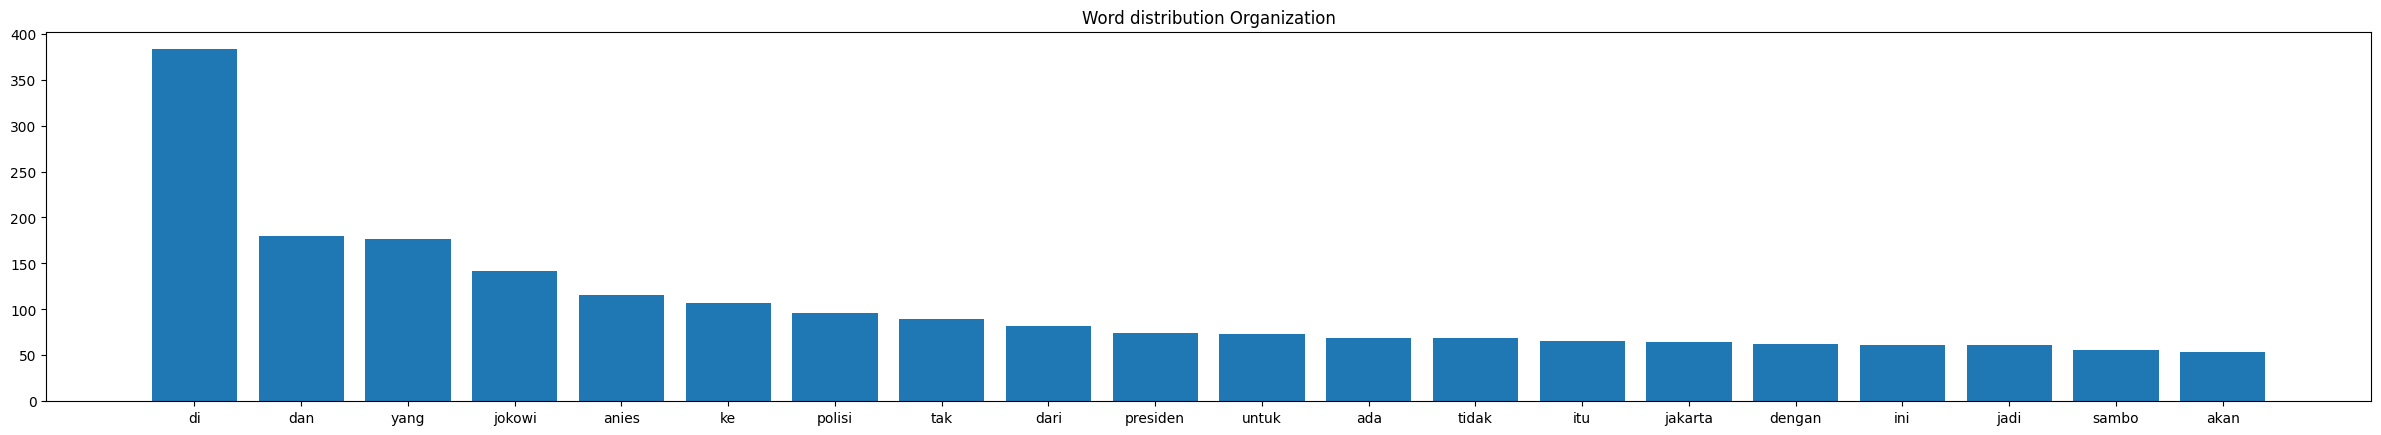

In [19]:
all_words = []
for i in labeling_organization_df:
    tweets = labeling_organization_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    tweets = tweets.to_list()
    for tweet in tweets:
        all_words += tweet.split()

word_num = {}
for word in all_words:
    if word not in word_num.keys():
        word_num[word] = 0
    word_num[word] += 1
    
word_num = dict(sorted(word_num.items(), reverse=True, key=lambda item: item[1]))
names = list(word_num.keys())[:num_word]
values = list(word_num.values())[:num_word]
plt.figure().set_figwidth(width_fig_size)
plt.bar(range(num_word), values, tick_label=names)
plt.title("Word distribution Organization")
plt.show()

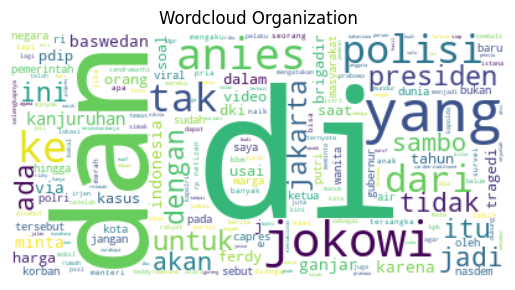

In [20]:
from wordcloud import WordCloud
all_tweets = []
for i in labeling_organization_df:
    tweets = labeling_organization_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    all_tweets += tweets.to_list()
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(all_tweets))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Wordcloud Organization")
plt.axis("off")
plt.show()

### On Replies

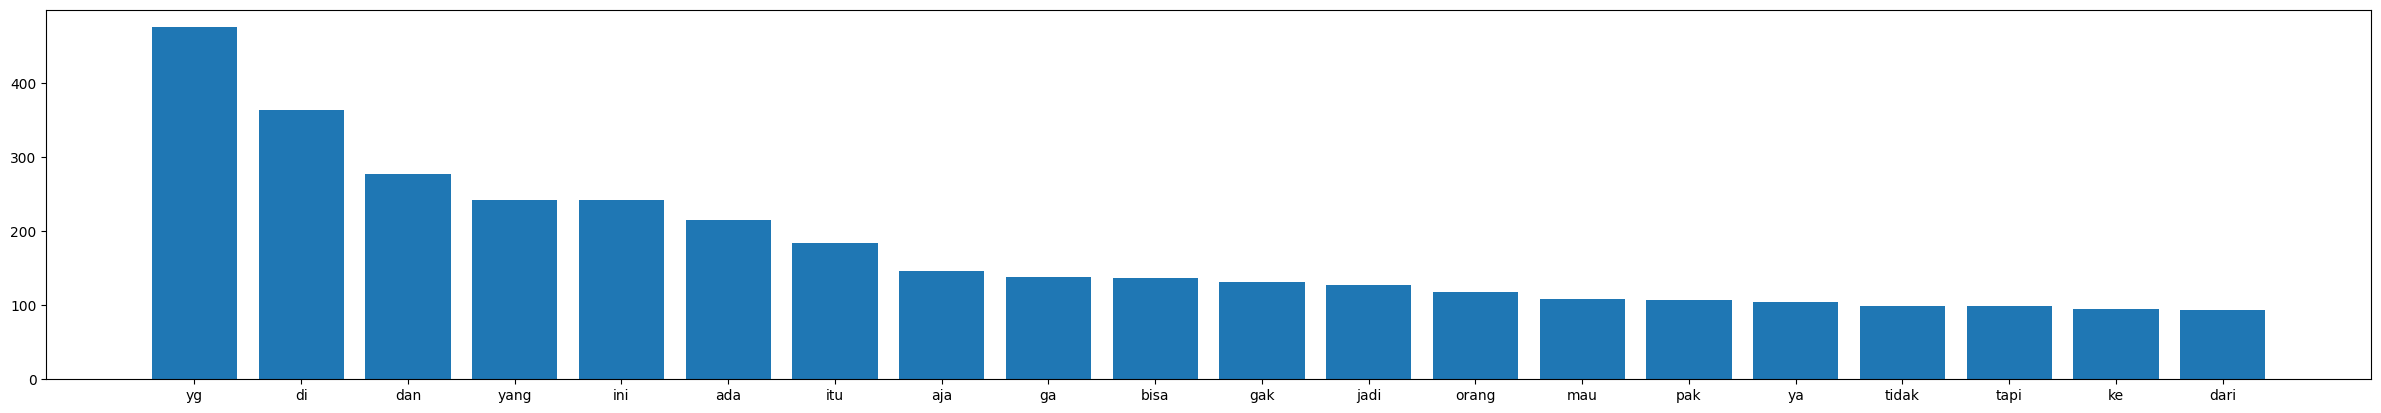

In [21]:
all_words = []
for i in labeling_replies_df:
    tweets = labeling_replies_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    tweets = tweets.to_list()
    for tweet in tweets:
        all_words += tweet.split()

word_num = {}
for word in all_words:
    if word not in word_num.keys():
        word_num[word] = 0
    word_num[word] += 1
    
word_num = dict(sorted(word_num.items(), reverse=True, key=lambda item: item[1]))
names = list(word_num.keys())[:num_word]
values = list(word_num.values())[:num_word]
plt.figure().set_figwidth(width_fig_size)
plt.bar(range(num_word), values, tick_label=names)
plt.show()

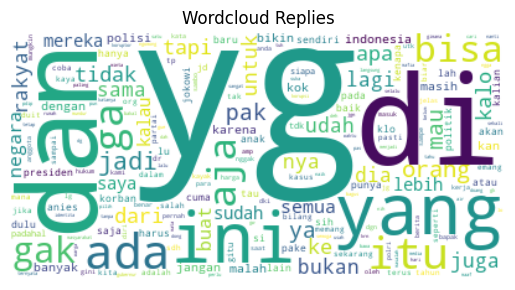

In [22]:
from wordcloud import WordCloud
all_tweets = []
for i in labeling_replies_df:
    tweets = labeling_replies_df[i]['tweet'].map(lambda x: preprocessor.process_text(x))
    all_tweets += tweets.to_list()
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(all_tweets))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Wordcloud Replies")
plt.axis("off")
plt.show()

## Combining Replies and Organizatino

In [20]:
# Just want to combine these
from tqdm import tqdm
tqdm.pandas()
combined_df_headline = [labeling_organization_df[i] for i in labeling_organization_df]
combined_df_headline = pd.concat(combined_df_headline).reset_index(drop=True)
combined_df_headline['tweet'] = combined_df_headline['tweet'].progress_map(lambda x: preprocessor.process_text(x))
combined_df_headline['labels'] = np.ones(len(combined_df_headline)).astype(np.int32)

combined_df_replies = [labeling_replies_df[i] for i in labeling_replies_df]
combined_df_replies = pd.concat(combined_df_replies).reset_index(drop=True)
combined_df_replies['tweet'] = combined_df_replies['tweet'].progress_map(lambda x: preprocessor.process_text(x))
combined_df_replies['labels'] = np.zeros(len(combined_df_replies)).astype(np.int32)

pd.concat([combined_df_replies, combined_df_headline])\
    .reset_index(drop=True)\
    .drop(columns=["tweet_id","tweet_date","tweet_conversation_id", "labels (Non-Headline 0 / Headline 1)"])\
    .to_csv("../../data/3. Labeling Ready/concat_all.csv", index=False)

100%|██████████| 1164/1164 [00:00<00:00, 166331.76it/s]


# Describe Data

In [12]:
# max and min Fetched dates
print(f"{'Data Name':20}\tMean Words\tMin Dates\t\t\tMax Dates")
all_min_dates = []
all_max_dates = []
for i in organizaton_df:
    tweets = organizaton_df[i]['tweet']
    mean_words = sum(tweets.map(lambda x: len(x.split()))) / len(tweets)
    
    dates = organizaton_df[i]["tweet_date"]
    dates = pd.to_datetime(dates)
    min_dates, max_dates = min(dates), max(dates)
    all_min_dates.append(min_dates)
    all_max_dates.append(max_dates)
    print(f"{i:20}{mean_words}\t{min_dates}\t{max_dates}")
    
print("Max Dates:", max(all_max_dates))
print("Min Dates:", min(all_min_dates))

Data Name           	Mean Words	Min Dates			Max Dates
CNNIndonesia.csv    10.938315539739028	2022-09-27 13:49:19+00:00	2022-12-30 13:10:56+00:00
detikcom.csv        22.176308539944902	2022-10-14 06:27:48+00:00	2022-12-30 10:51:11+00:00
tvOneNews.csv       15.328729281767956	2022-01-09 00:20:32+00:00	2022-12-30 14:38:34+00:00
VIVAcoid.csv        11.675883256528417	2022-04-01 10:59:33+00:00	2022-12-29 06:48:13+00:00
Max Dates: 2022-12-30 14:38:34+00:00
Min Dates: 2022-01-09 00:20:32+00:00


# Trying Tokenizer

In [5]:
import pandas as pd
df = pd.read_csv("../../data/4. Processed/0/train.csv")

In [6]:
import typing
import torch

from tokenizers import Tokenizer, models, pre_tokenizers, trainers


class WordTokenizer:
    special_vocab2id = {
        "[PAD]": 0,
        "[UNK]": 1,
    }
    special_id2vocab = {v: k for k, v in special_vocab2id.items()}
    special_token = list(special_vocab2id.keys())

    def __init__(self, vocab_size=10000) -> None:
        self.vocab_size = vocab_size

        self.tokenizer = Tokenizer(
            models.WordLevel(vocab=self.special_vocab2id, unk_token="[UNK]")
        )

        self.tokenizer.pre_tokenizer = pre_tokenizers.Sequence(
            [pre_tokenizers.WhitespaceSplit()]
        )  # type: ignore

    def train(self, corpus: "typing.List[str]", min_frequency=2):
        trainer = trainers.WordLevelTrainer(
            vocab_size=self.vocab_size,
            min_frequency=min_frequency,
            special_tokens=self.special_token,
        )  # type: ignore

        self.tokenizer.train_from_iterator(corpus, trainer=trainer)

    def encode(self, text: "typing.List[str]", max_length=256) -> "torch.Tensor":
        self.tokenizer.enable_padding(
            direction="right", pad_id=self.special_vocab2id["[PAD]"], length=max_length
        )
        self.tokenizer.enable_truncation(max_length)

        tokenized = self.tokenizer.encode_batch(text)

        final_tokenized = []

        for encode in tokenized:
            final_tokenized.append(encode.ids)

        final_tokenized = torch.tensor(final_tokenized)

        self.tokenizer.no_padding()
        self.tokenizer.no_truncation()

        return final_tokenized

    def save(self, path: "str"):
        self.tokenizer.save(path)

    def __init_from_path__(self, path):
        self.tokenizer.from_file(path)

    @classmethod
    def load(cls, path):
        obj = cls.__new__(cls)
        obj.tokenizer = Tokenizer.from_file(path)
        return obj
